<a href="https://colab.research.google.com/github/data2450/cotton-plant-disease-detection/blob/main/cotton_plant_vgg19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://pastebin.com/SWHwT6qL

In [ ]:
import os
%cd '/content/drive/MyDrive/datasets_for_colab/data/'

/content/drive/.shortcut-targets-by-id/161/data


In [ ]:
#import libraries
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [ ]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/datasets_for_colab/data/train'
valid_path = '/content/drive/MyDrive/datasets_for_colab/data/val'

In [ ]:
vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

80142336/80134624 [==============================] - 0s 0us/step


In [ ]:
for layer in vgg19.layers:
    layer.trainable = False

In [ ]:
folders =glob("/content/drive/MyDrive/datasets_for_colab/data/train/*")

In [ ]:
x = Flatten()(vgg19.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg19.input, outputs=prediction)

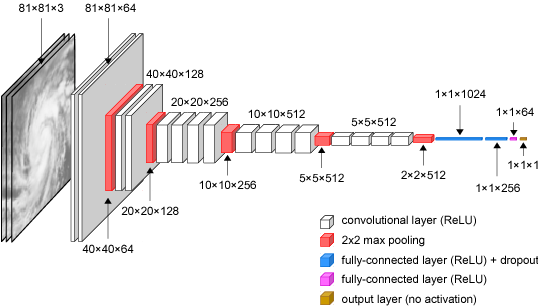

VGG19 has 16 convolutional layers. +3 fully connected layers

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

valid_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/datasets_for_colab/data/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [ ]:
valid_set = valid_datagen.flow_from_directory('/content/drive/MyDrive/datasets_for_colab/data/val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 324 images belonging to 4 classes.


In [ ]:

r = model.fit_generator(
  training_set,
  validation_data=valid_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(valid_set)
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
61/61 [==============================] - 237s 4s/step - loss: 0.3148 - accuracy: 0.8713 - val_loss: 0.2395 - val_accuracy: 0.9136
Epoch 2/10
61/61 [==============================] - 34s 561ms/step - loss: 0.2333 - accuracy: 0.9134 - val_loss: 0.2524 - val_accuracy: 0.8920
Epoch 3/10
61/61 [==============================] - 34s 561ms/step - loss: 0.2505 - accuracy: 0.9088 - val_loss: 0.2312 - val_accuracy: 0.8889
Epoch 4/10
61/61 [==============================] - 34s 563ms/step - loss: 0.1627 - accuracy: 0.9446 - val_loss: 0.2029 - val_accuracy: 0.9105
Epoch 5/10
61/61 [==============================] - 34s 562ms/step - loss: 0.1561 - accuracy: 0.9436 - val_loss: 0.1997 - val_accuracy: 0.9136
Epoch 6/10
61/61 [==============================] - 34s 564ms/step - loss: 0.1241 - accuracy: 0.9621 - val_loss: 0.1634 - val_accuracy: 0.9352
Epoch 7/10
61/61 [==============================] - 34s 558ms/step - loss: 0.1325 - accuracy: 0.9503 - val_loss: 0.1788 - val_accuracy: 0.9352
E

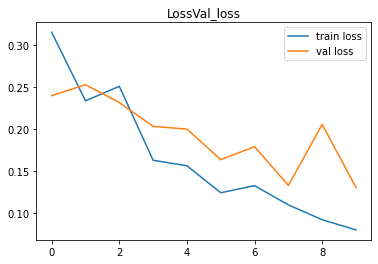

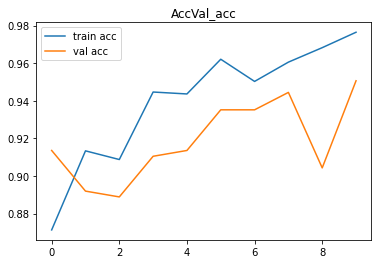

In [ ]:
import matplotlib.pyplot as plt
plt.title('LossVal_loss')
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()


# plot the accuracy
plt.title('AccVal_acc')
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [ ]:
%cd /content/drive/MyDrive/datasets_for_colab

/content/drive/MyDrive/datasets_for_colab


In [ ]:
from tensorflow.keras.models import load_model
model.save('model_vgg19_cotton.h5')

In [ ]:
from tensorflow.keras.models import load_model
model=load_model('model_vgg19_cotton.h5')

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
img=image.load_img('/content/drive/MyDrive/datasets_for_colab/data/test/diseased cotton leaf/dis_leaf (124).jpg',target_size=(224,224))

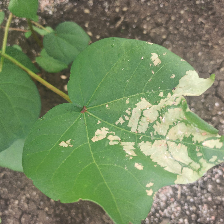

In [ ]:
img

In [ ]:
import numpy as np
x=image.img_to_array(img)
img_data=np.expand_dims(x,axis=0)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

array([[1., 0., 0., 0.]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

In [ ]:
a

array([0])

In [ ]:
test_set = valid_datagen.flow_from_directory('/content/drive/MyDrive/datasets_for_colab/data/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 36 images belonging to 5 classes.


In [ ]:
y_pred = model.predict(test_set)

In [ ]:
y_pred = np.argmax(y_pred, axis=1)

In [ ]:

y_pred

array([3, 1, 2, 1, 3, 1, 2, 3, 1, 0, 0, 1, 2, 2, 0, 1, 3, 2, 1, 1, 2, 1,
       0, 3, 2, 3, 2, 3, 1, 0, 0, 1, 3, 3, 0, 0])

In [ ]:
img2=image.load_img('/content/drive/MyDrive/datasets_for_colab/data/test/diseased cotton plant/dd (328).jpg',target_size=(224,224))

In [ ]:
x=image.img_to_array(img2)
img_data=np.expand_dims(x,axis=0)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

array([[3.5007584e-15, 9.7765541e-01, 2.2344612e-02, 0.0000000e+00]],
      dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

In [ ]:
a

array([1])

In [ ]:
img3=image.load_img('/content/drive/MyDrive/datasets_for_colab/data/test/fresh cotton plant/dsd (405).jpg',target_size=(224,224))

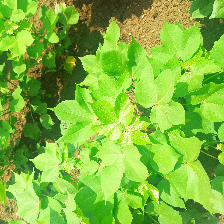

In [ ]:
img3

In [ ]:
x=image.img_to_array(img3)
img_data=np.expand_dims(x,axis=0)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

array([[5.8046266e-23, 3.7316481e-35, 1.6233797e-19, 1.0000000e+00]],
      dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)
print(a)

[3]


In [ ]:
test_set1 =valid_datagen.flow_from_directory('/content/drive/MyDrive/datasets_for_colab/test_modified',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            color_mode="rgb")

Found 18 images belonging to 4 classes.


In [ ]:
y_pred = model.predict(test_set)

In [ ]:
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([1, 2, 1, 3, 3, 0, 1, 2, 1, 3, 2, 1, 1, 3, 2, 2, 3, 2, 0, 0, 0, 3,
       2, 0, 3, 0, 1, 3, 1, 1, 2, 0, 1, 0, 3, 1])